In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib 

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [33]:
e = np.load('loadFromTemplates/allError_unconstrained.npy')

In [34]:
p = np.load('loadFromTemplates/allInputs_unconstrained.npy')

In [21]:
groundTruths = []
for i in range(10):
    groundTruths.append(np.load('groundTruth/Signals_Stim_'+str(i)+'.npy'))

In [9]:
goodIdx = np.argsort(e.flatten())

In [11]:
goodIdx[-1]

np.int64(119)

In [12]:
time = np.linspace(-.5,.5,49997)*1e3

In [28]:
trueProbs = []
for i in range(39):
    trueProbs.append(np.load('groundTruth/fiberProbs_'+str(i)+'.npy'))
trueProbs = np.array(trueProbs)[:,:,0]*100

In [30]:
trueProbs[0]

array([7.21137937, 8.67871954])

(0.0, 50.0)

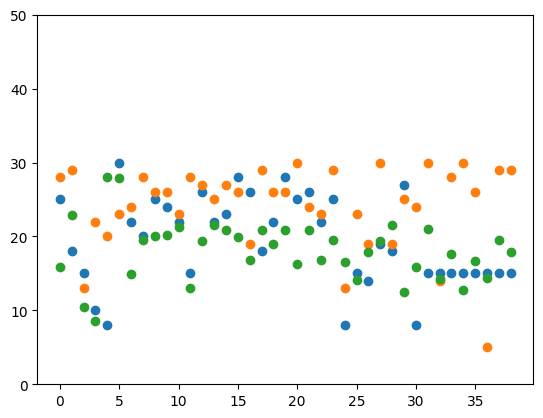

In [31]:
plt.figure()
plt.scatter(np.arange(39),p[0])
plt.scatter(np.arange(39),p[goodIdx[0]])
#plt.scatter(np.arange(39),p[goodIdx[-1]])
plt.scatter(np.arange(39),np.sum(trueProbs,axis=-1))


plt.ylim([0,50])

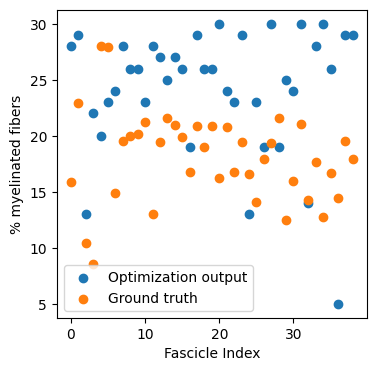

In [36]:
plt.figure(figsize=(4,4))
plt.scatter(np.arange(39),p[goodIdx[0]])
plt.scatter(np.arange(39),np.sum(trueProbs,axis=-1))
plt.legend(['Optimization output','Ground truth'])
plt.xlabel('Fascicle Index')
plt.ylabel('% myelinated fibers')
plt.savefig('OptimzedValues.png',dpi=600)

(array([1., 4., 8., 9., 7., 7., 2., 0., 0., 1.]),
 array([-14.51743138, -11.06816372,  -7.61889606,  -4.1696284 ,
         -0.72036074,   2.72890692,   6.17817458,   9.62744224,
         13.0767099 ,  16.52597756,  19.97524522]),
 <BarContainer object of 10 artists>)

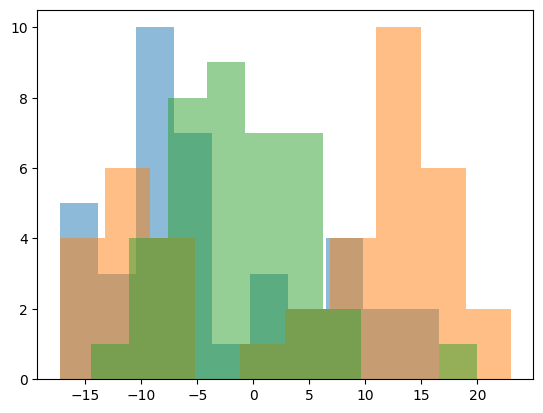

In [10]:
plt.figure()
plt.hist(np.sum(trueProbs,axis=-1)-p[goodIdx[0]][:,0],alpha=0.5)
plt.hist(np.sum(trueProbs,axis=-1)-p[goodIdx[-1]][:,0],alpha=0.5)
plt.hist(np.sum(trueProbs,axis=-1)-p[0][:,0],alpha=0.5)

In [15]:
from vagusNerve.nerveSetup import getFibersPerFascicle,getFascicleTypes

def calculateResult(fascParams):

    numFibersIfOnlyMaff = []
    numFibers = []

    fascTypes = getFascicleTypes()

    distribution_params_onlyMaff= {'maff':{'diameterParams':None, 'fiberTypeFractions':np.ones(39)*100},'meff':{'diameterParams':None, 'fiberTypeFractions':np.zeros(39)*100}}

    for fasc in range(39):

        numFibersIfOnlyMaff.append(getFibersPerFascicle(fasc,fascTypes,distribution_params_onlyMaff))

        maffFrac = fascParams[fasc]*.01

        distribution_params = {'maff':{'diameterParams':None, 'fiberTypeFractions':np.ones(39)*100*maffFrac},'meff':{'diameterParams':None, 'fiberTypeFractions':np.zeros(39)*100}}

        numFibers.append(getFibersPerFascicle(fasc,fascTypes,distribution_params))

    signalList = []

    for simulation in range(10):

        for fasc in range(39):
            maffFrac = fascParams[fasc]*.01

            distribution_params = {'maff':{'diameterParams':None, 'fiberTypeFractions':np.ones(39)*100*maffFrac},'meff':{'diameterParams':None, 'fiberTypeFractions':np.zeros(39)*100}}

            sigMaff = np.load('templates/Signals_Stim_'+str(simulation)+'_'+str(fasc)+'.npy')*maffFrac*numFibers[fasc]/numFibersIfOnlyMaff[fasc]

            if fasc == 0:
                signal = sigMaff
            else:
                signal += sigMaff

        signalList.append(signal)

    return np.array(signalList)

In [16]:
bestSignal = calculateResult(p[goodIdx[0]])

In [17]:
bestSignal.shape

(10, 1, 10, 49997)

In [18]:
worstSignal = calculateResult(p[goodIdx[-1]])

In [22]:
groundTruths[0].shape

(1, 10, 49997)

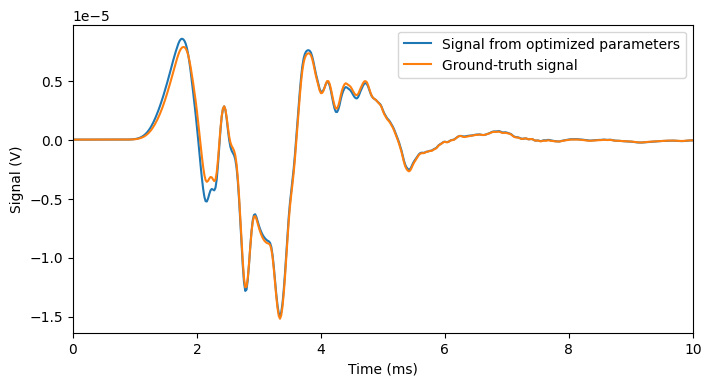

In [38]:
plt.figure(figsize=(8,4))
plt.plot(time,bestSignal[0,0,1])
plt.plot(time,groundTruths[0][0,1])
plt.xlabel('Time (ms)')
plt.xlim([0,10])
plt.ylabel('Signal (V)')
plt.legend(['Signal from optimized parameters','Ground-truth signal'])
plt.savefig('OptimizedSignals.png',dpi=600)

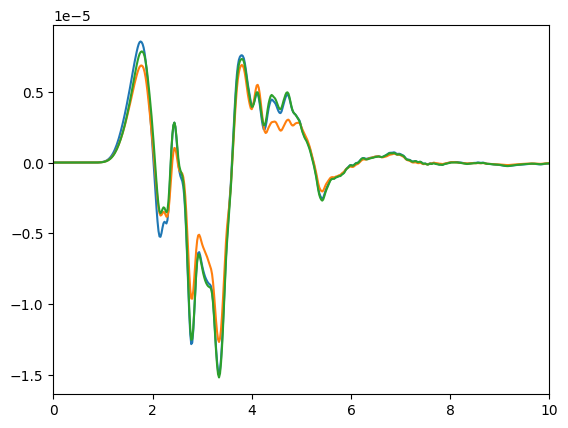

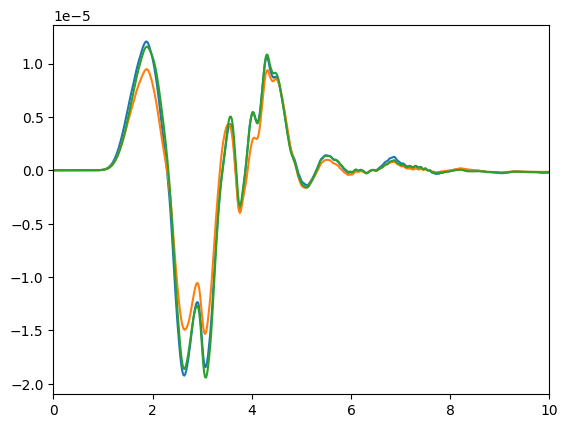

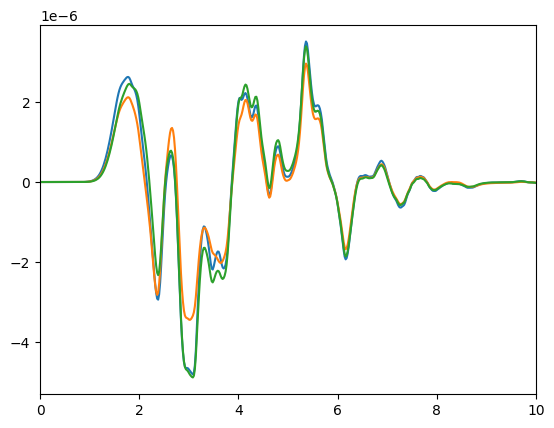

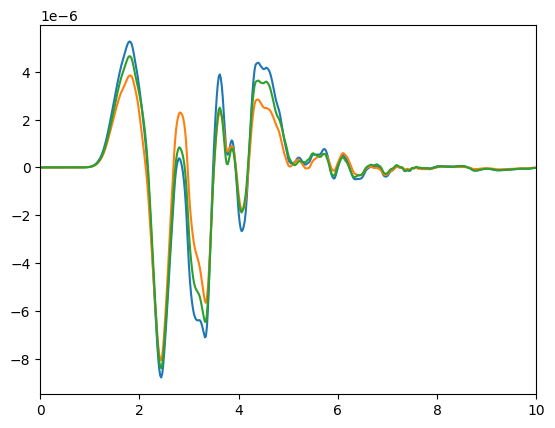

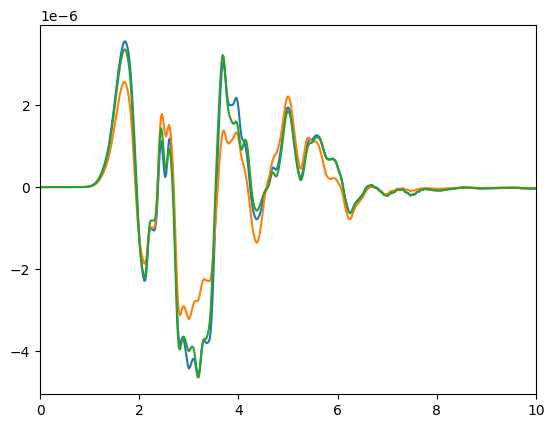

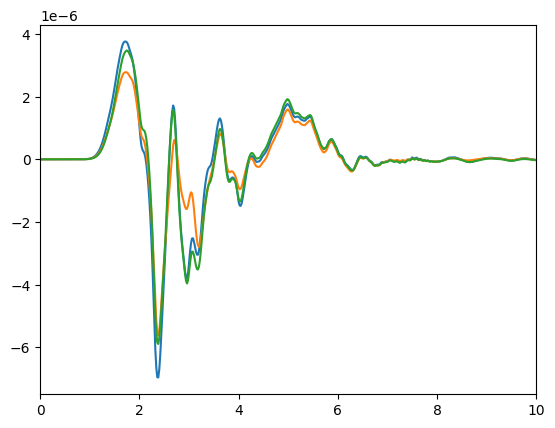

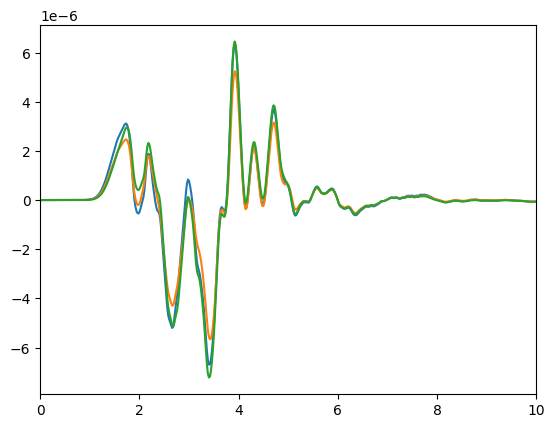

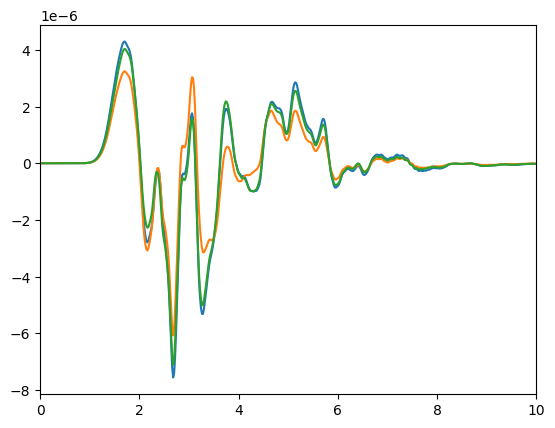

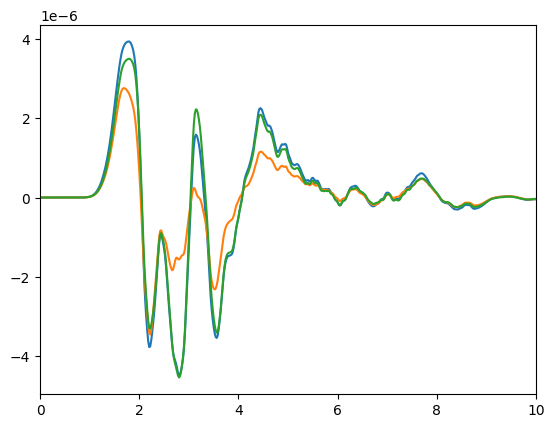

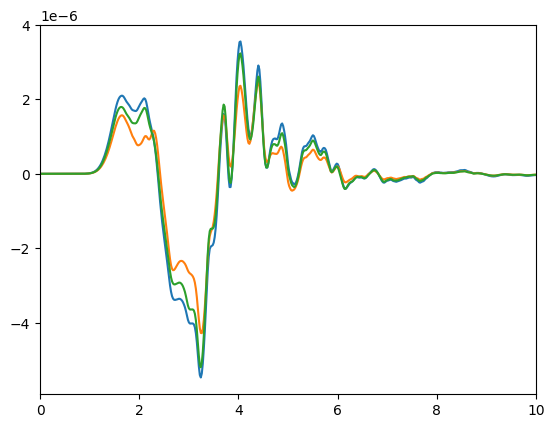

In [26]:

currentIdx = 1

for i in range(10):
    plt.figure()
    plt.plot(time,bestSignal[i,0,currentIdx])
    plt.plot(time,worstSignal[i,0,currentIdx])
    plt.plot(time,groundTruths[i][0,currentIdx])
    
    plt.xlim([0,10])

In [19]:
templates = []
for i in range(10):
    templates.append([])
    for j in range(39):
        templates[i].append( np.load('../templates/Signals_Stim'+str(i)+'_'+str(j)+'.npy') )

templates = np.array(templates)

In [20]:
templates.shape

(10, 39, 49997)

(0.0, 10.0)

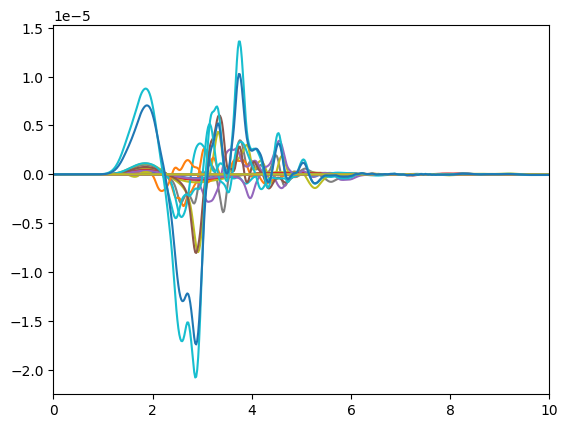

In [39]:
plt.figure()
for i in range(39):
    plt.plot(time,templates[0,i])
plt.plot(time,np.sum(templates[0],axis=0))
plt.plot(time,groundTruths[0])
plt.xlim([0,10])

29
21
20
16
15
15
16
16
18
18


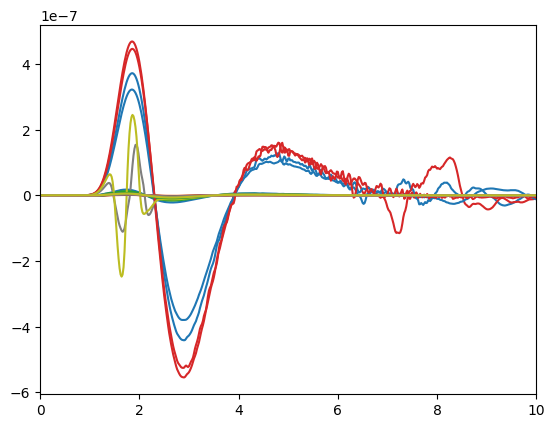

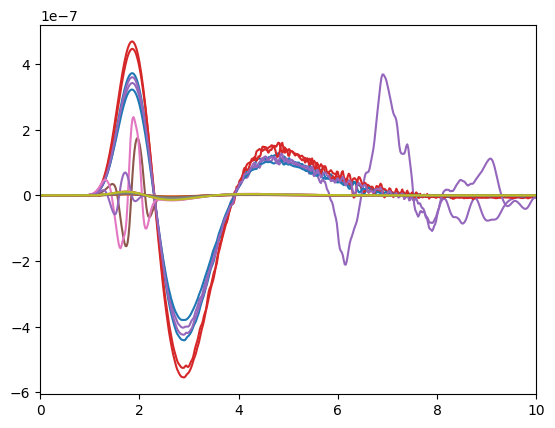

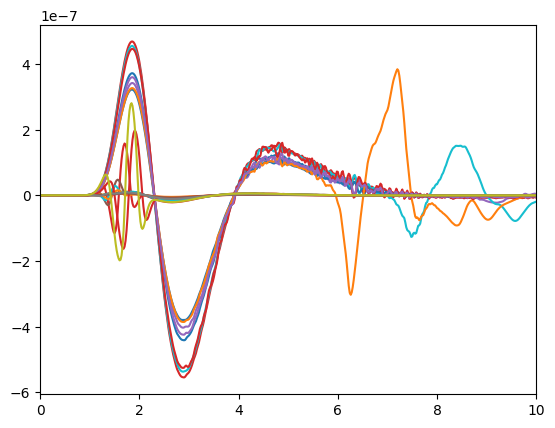

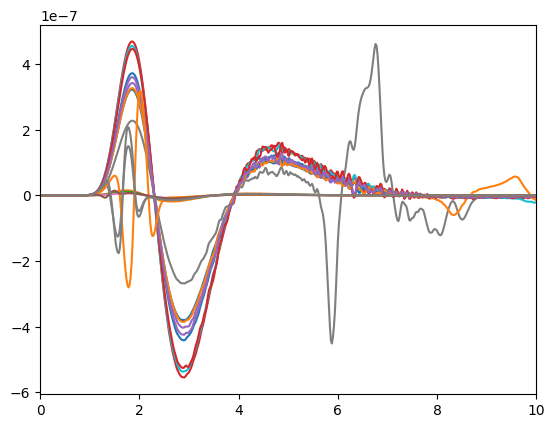

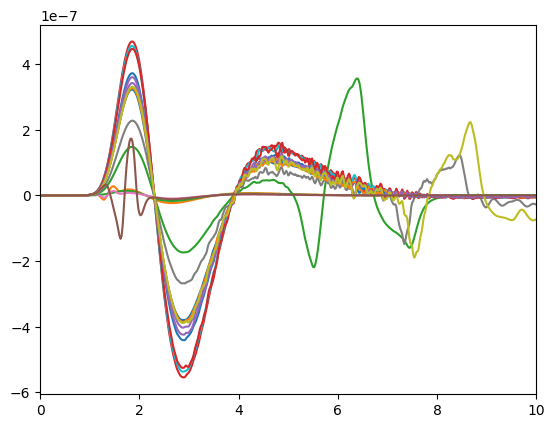

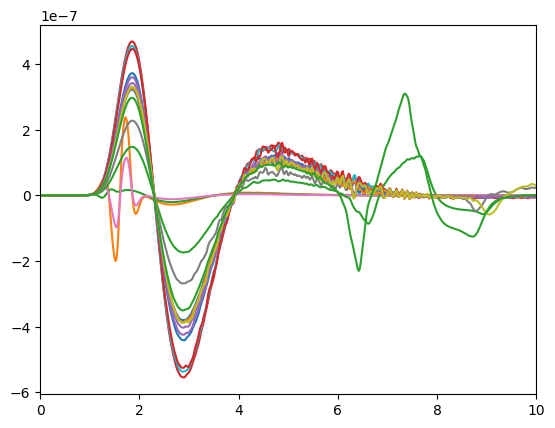

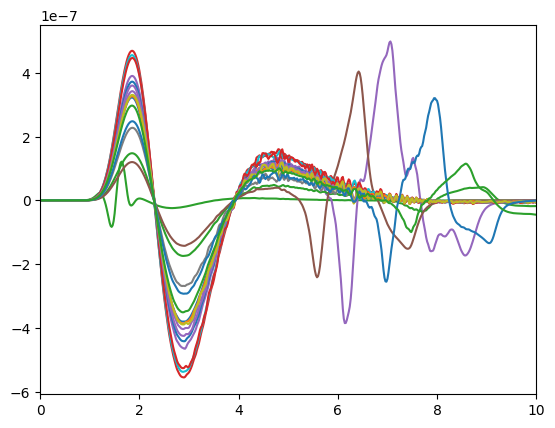

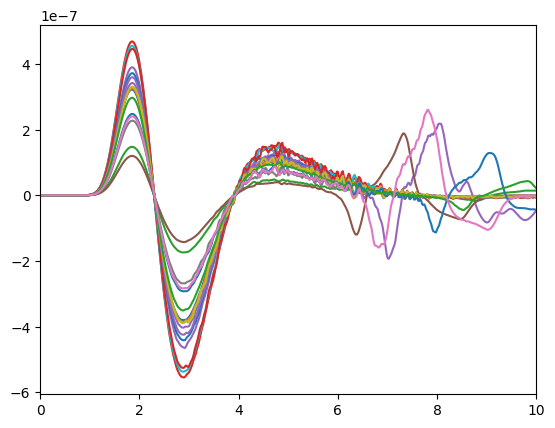

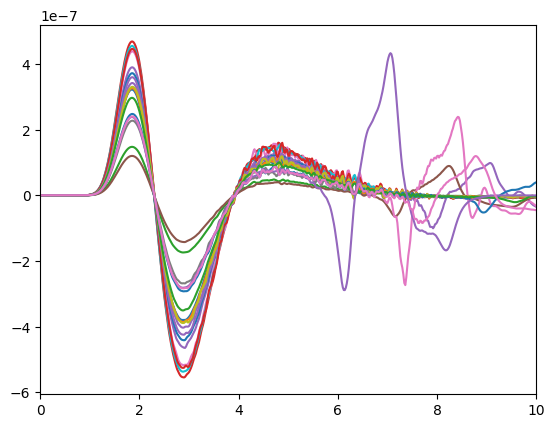

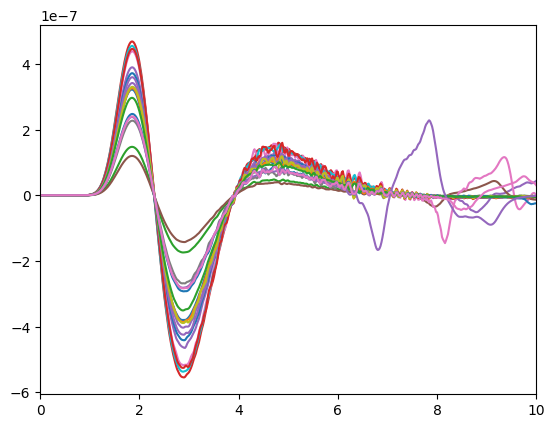

In [66]:
for i in range(10):
    plt.figure()
    numSmall = 0
    for j in range(39):
        if np.max(templates[i,j])<0.5e-6:
            plt.plot(time,templates[i,j],c='C'+str(j))
            numSmall += 1
    print(numSmall)
    plt.xlim([0,10])

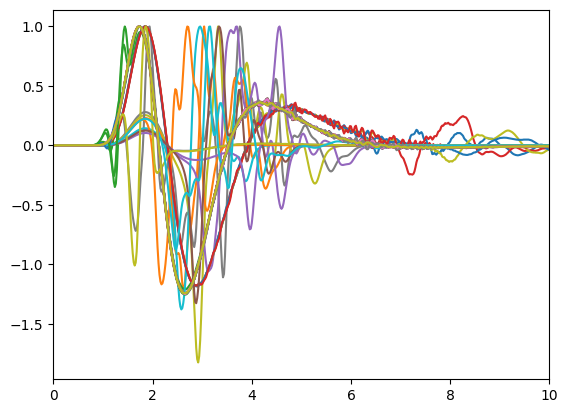

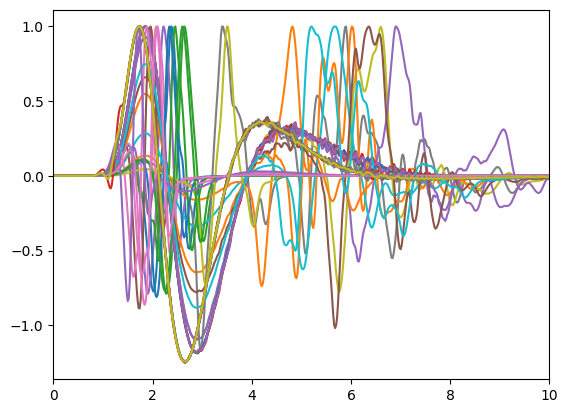

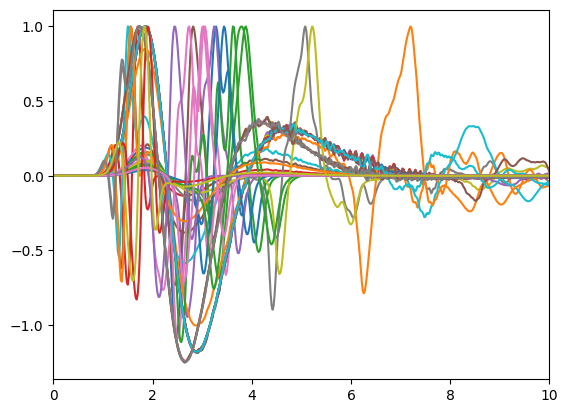

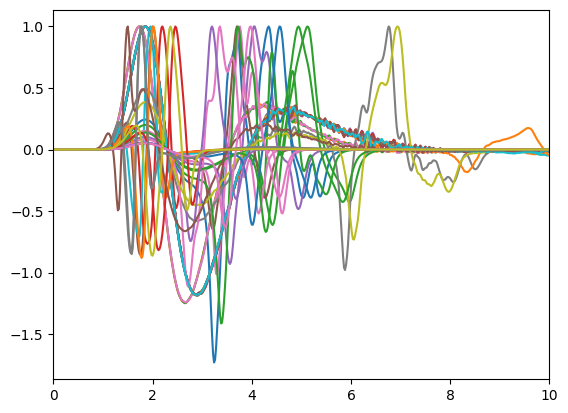

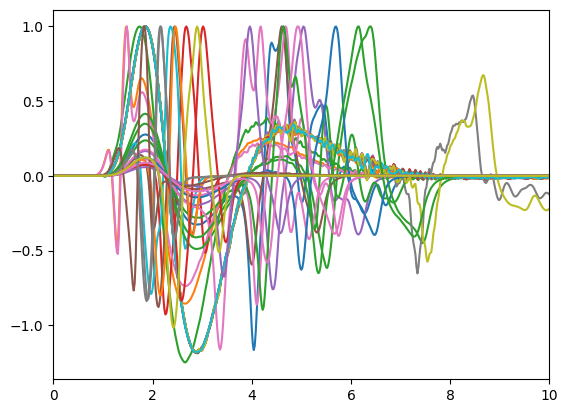

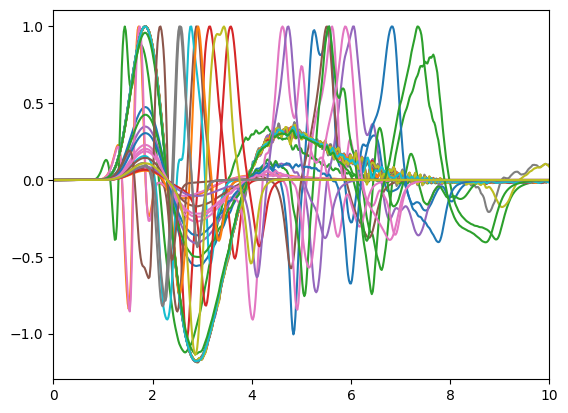

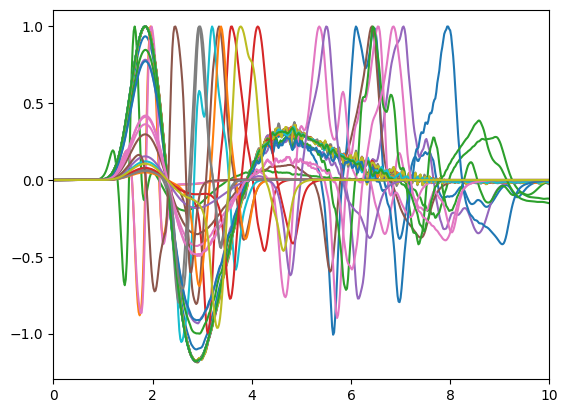

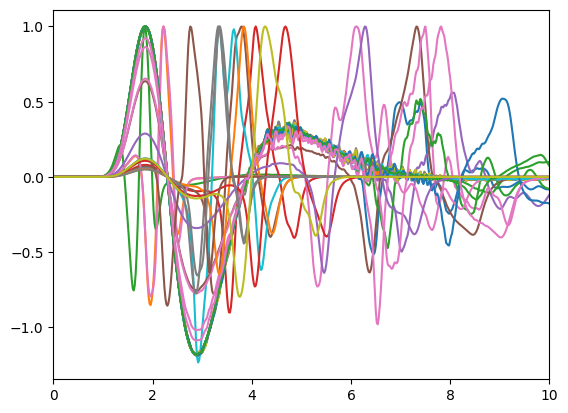

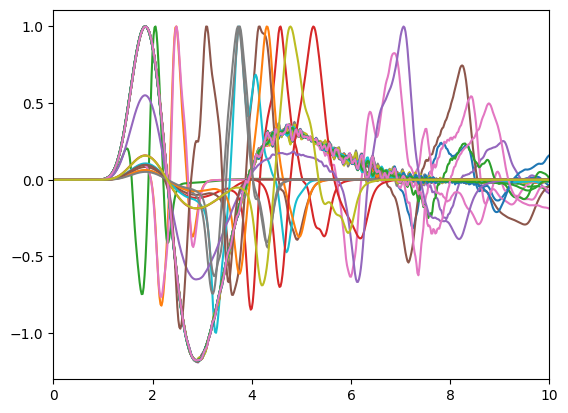

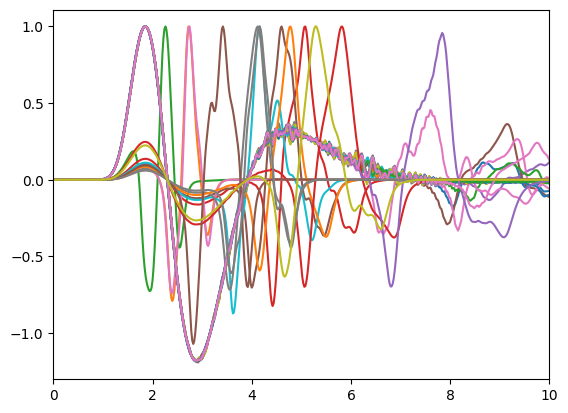

In [68]:
for i in range(10):
    plt.figure()
    for j in range(39):
        plt.plot(time,templates[i,j]/np.max(templates[i,j]),c='C'+str(j))
    plt.xlim([0,10])

C:\Users\tharayil\AppData\Local\Temp\ipykernel_18208\3810162966.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


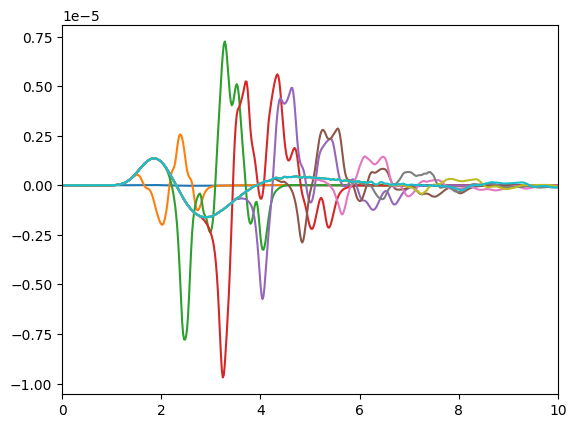

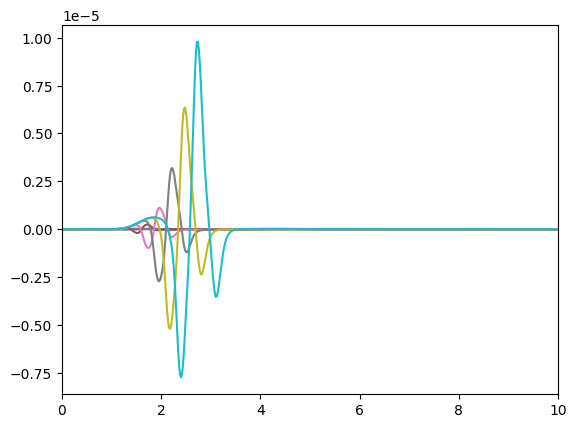

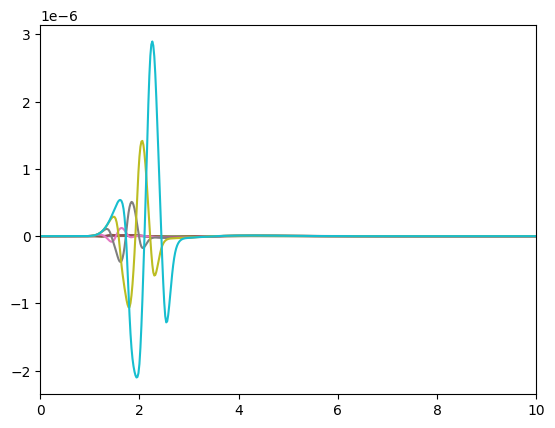

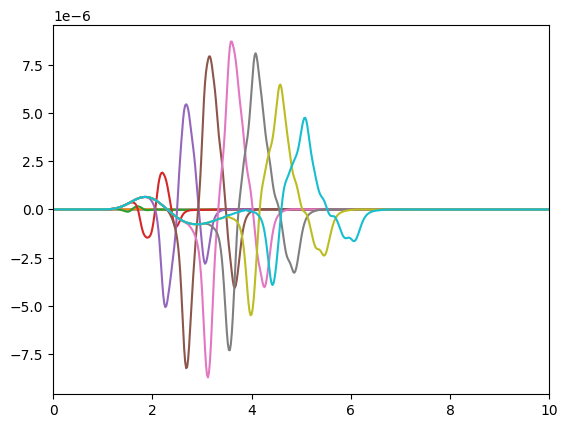

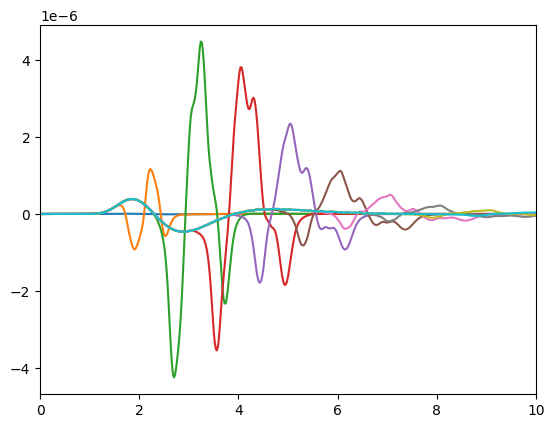

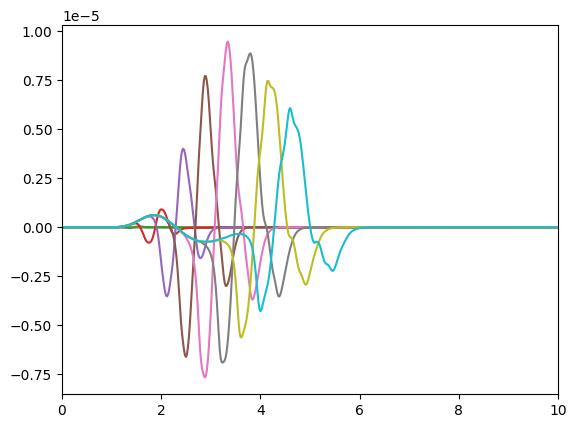

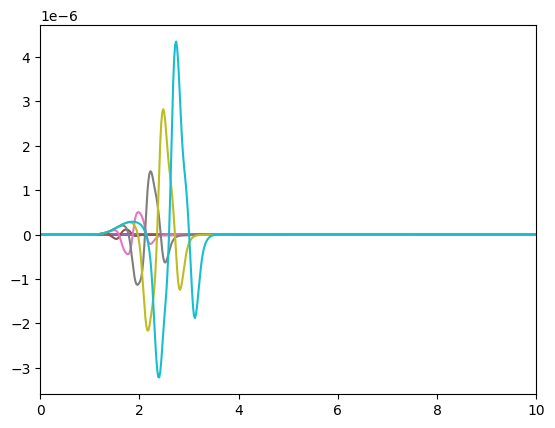

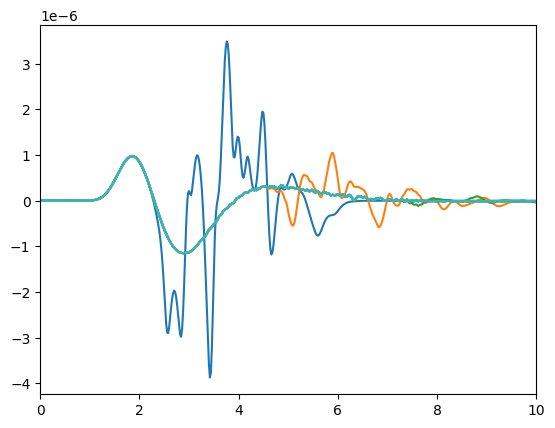

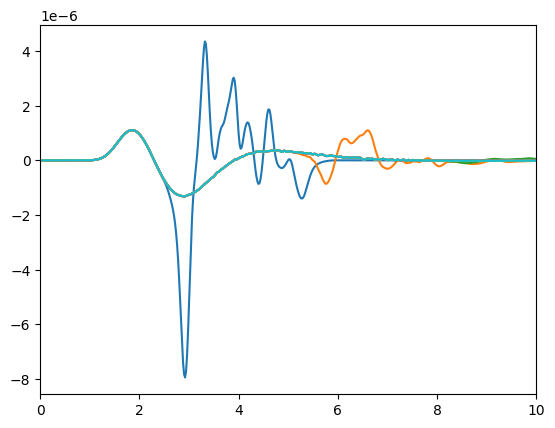

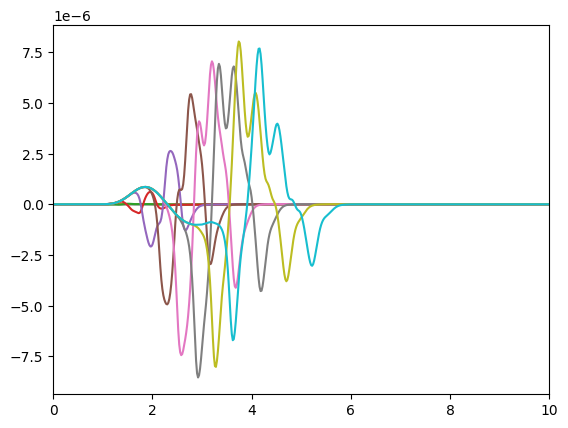

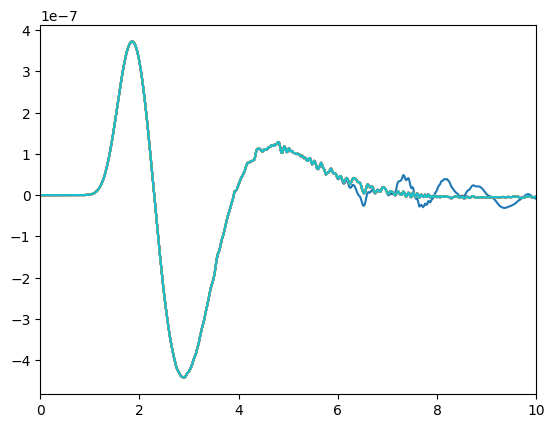

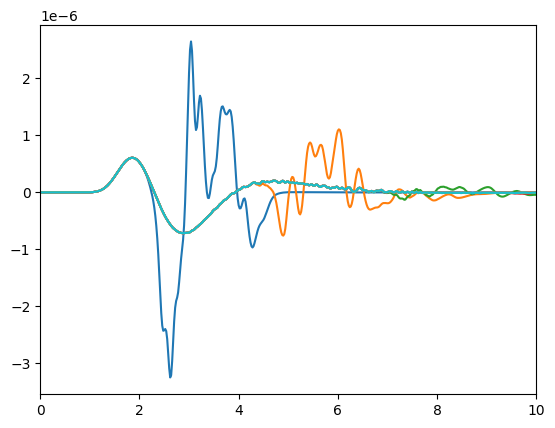

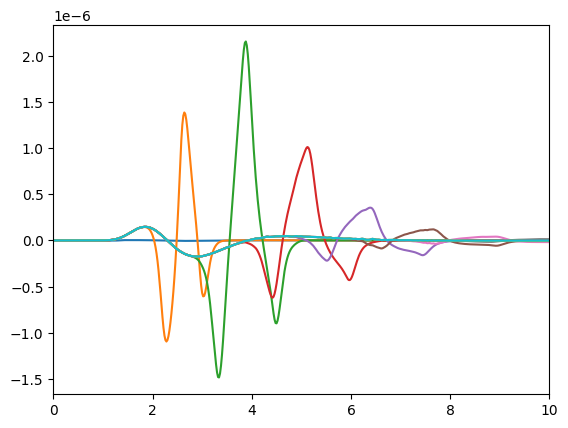

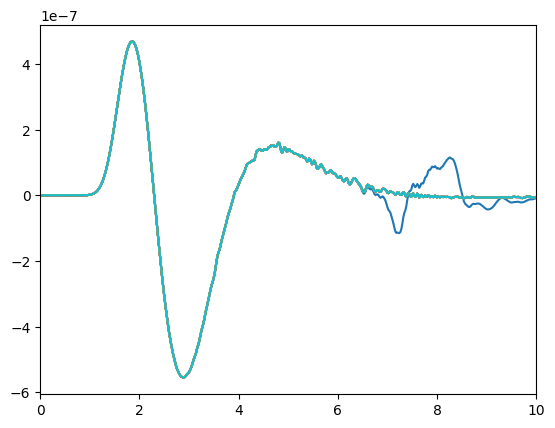

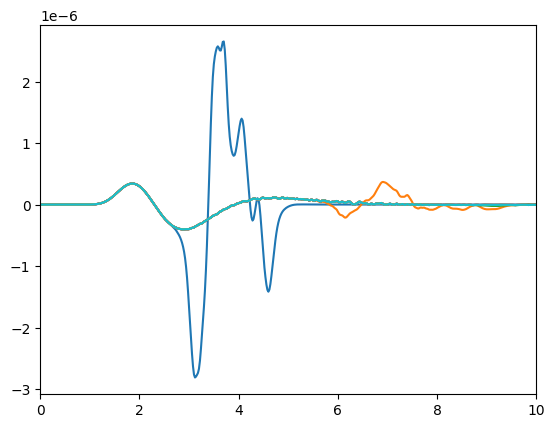

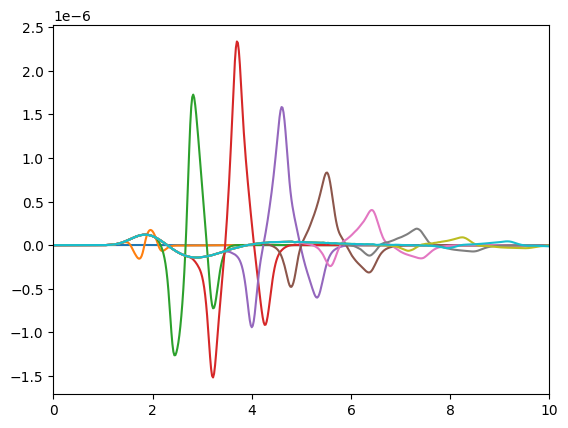

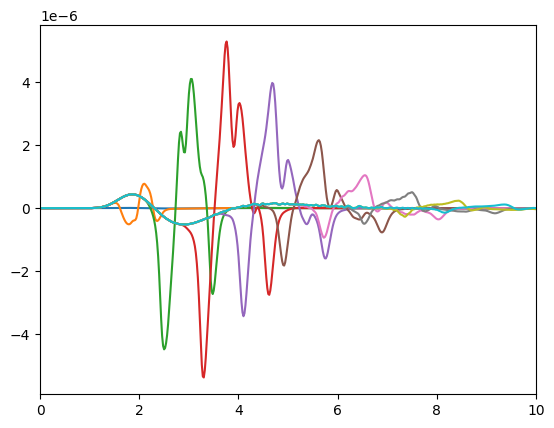

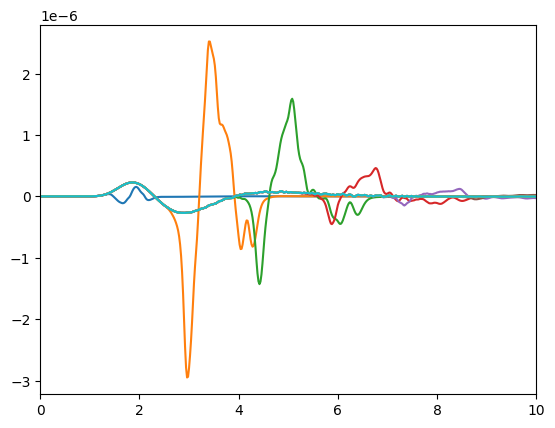

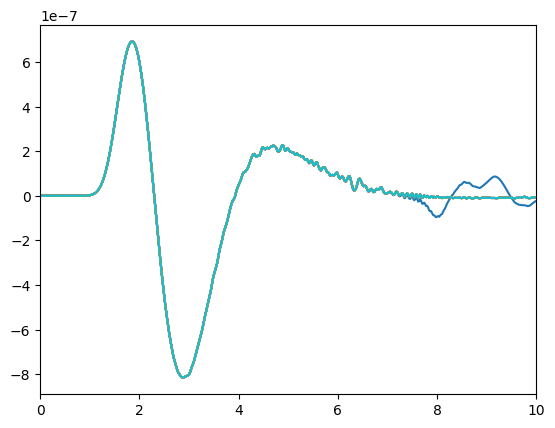

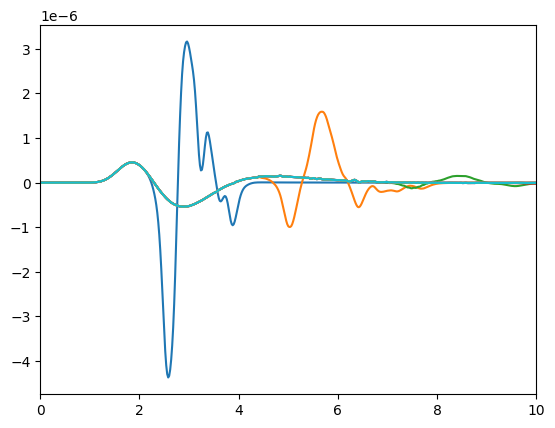

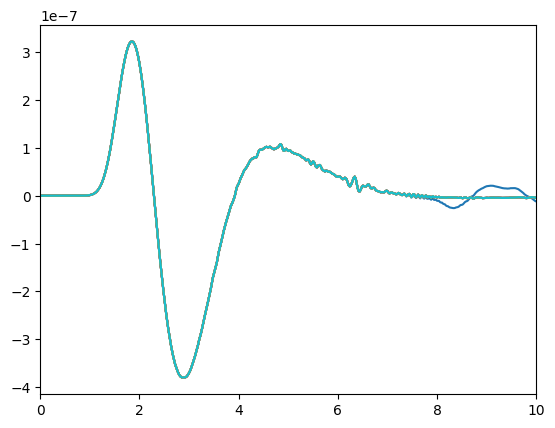

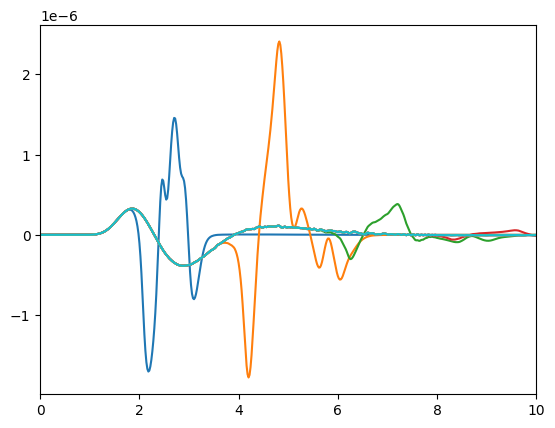

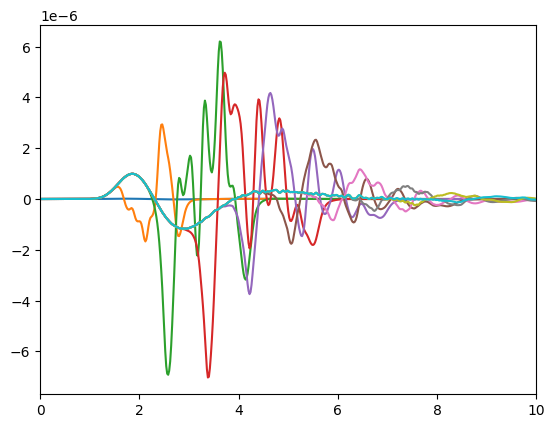

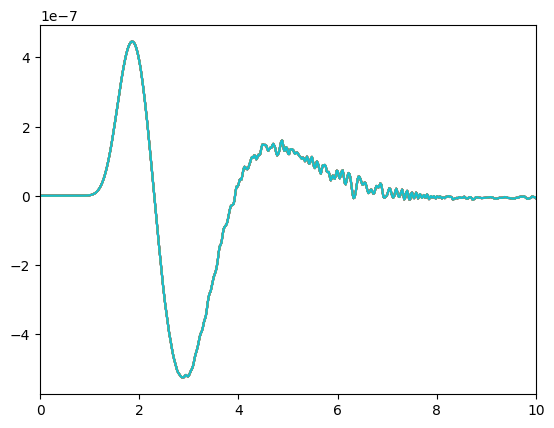

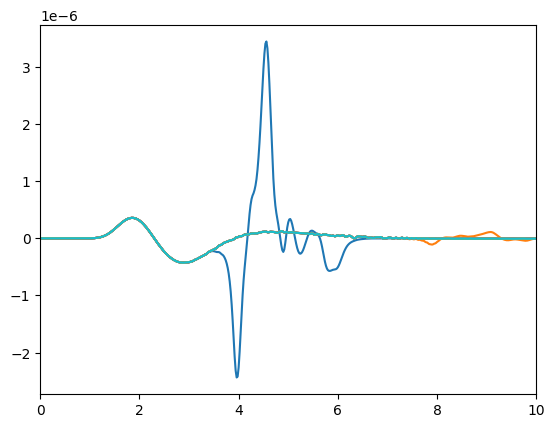

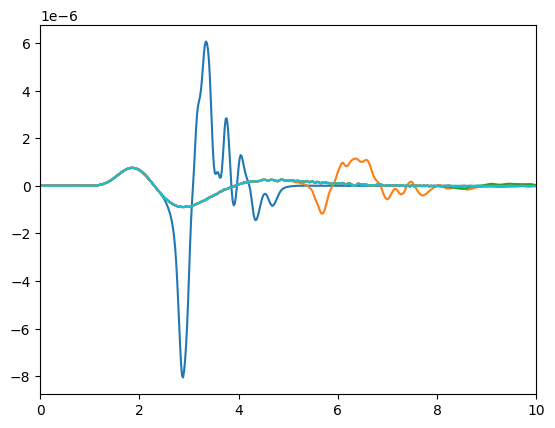

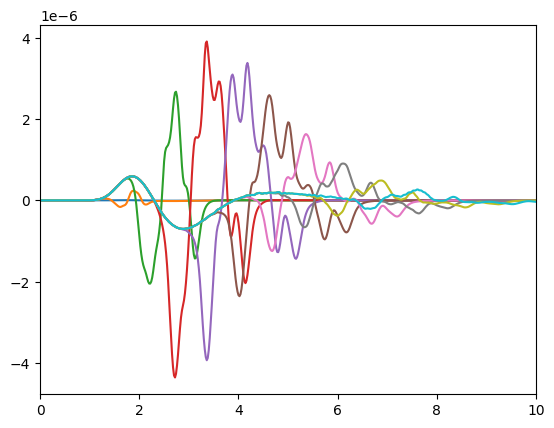

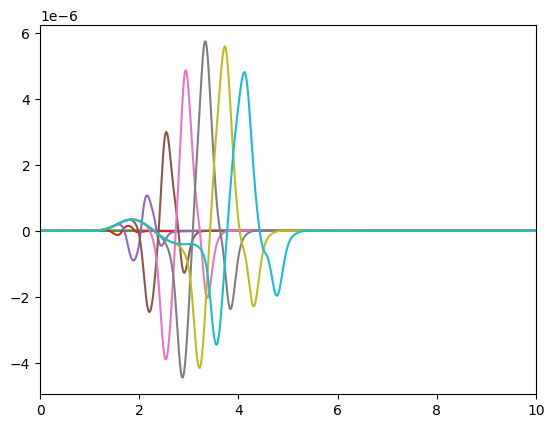

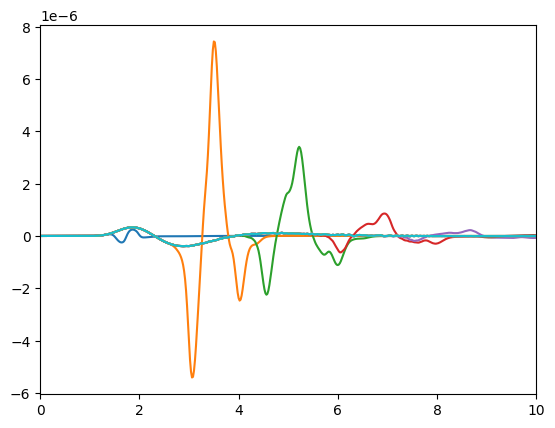

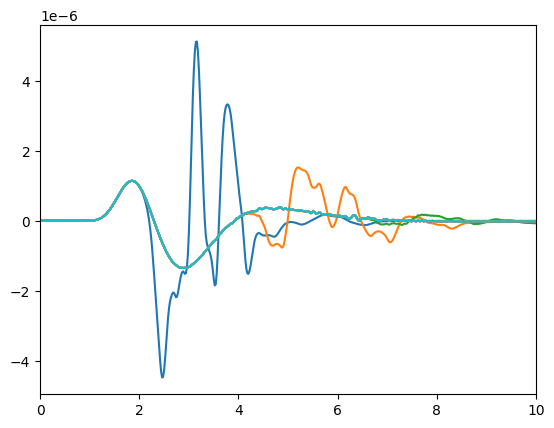

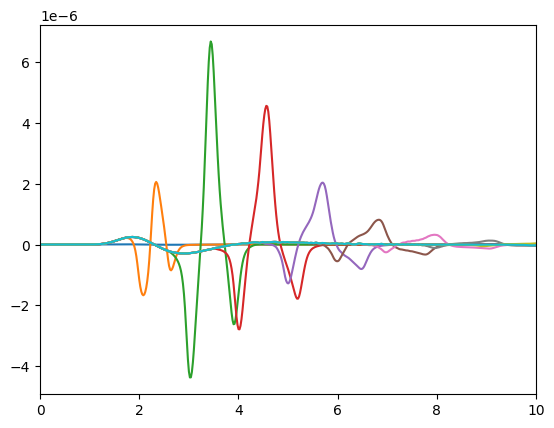

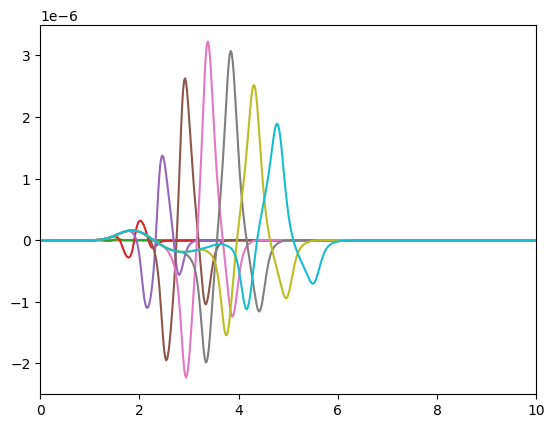

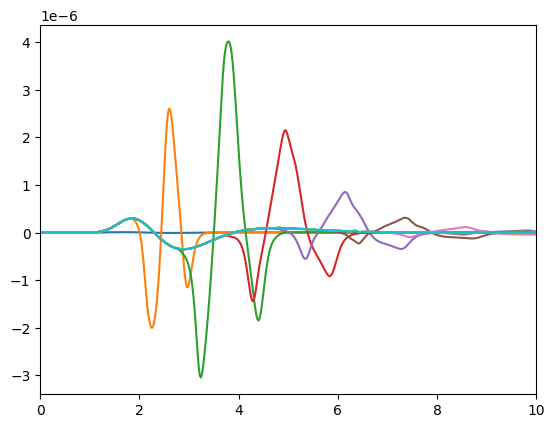

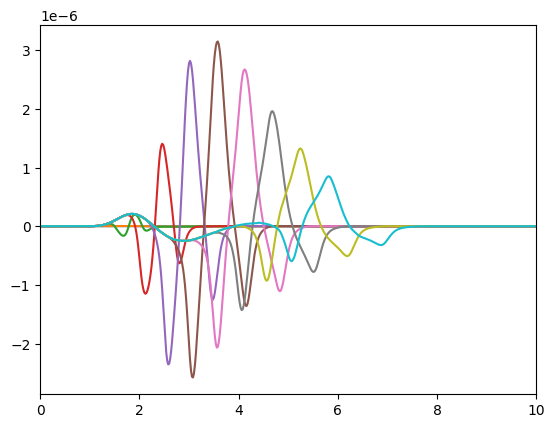

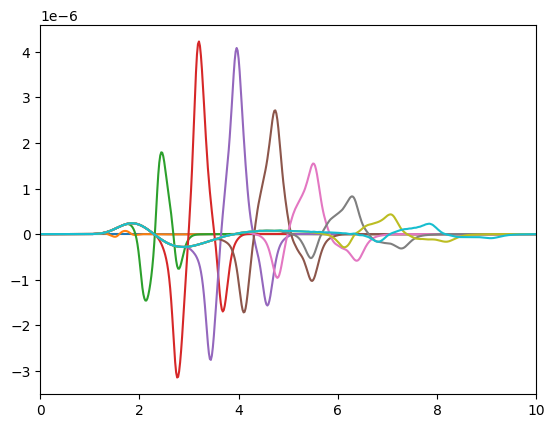

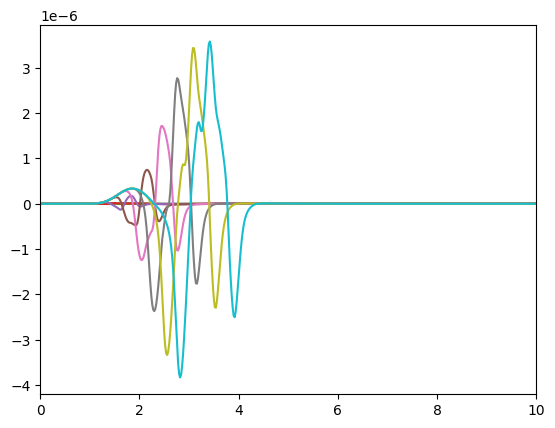

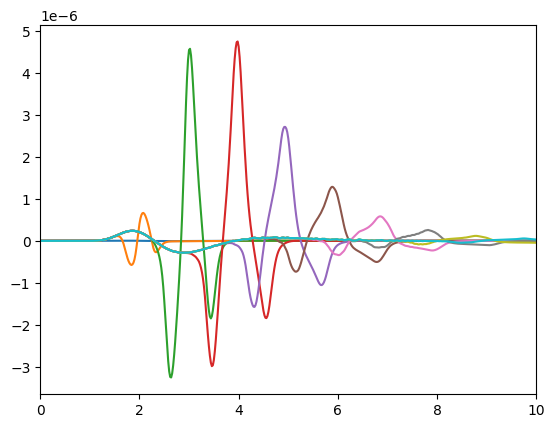

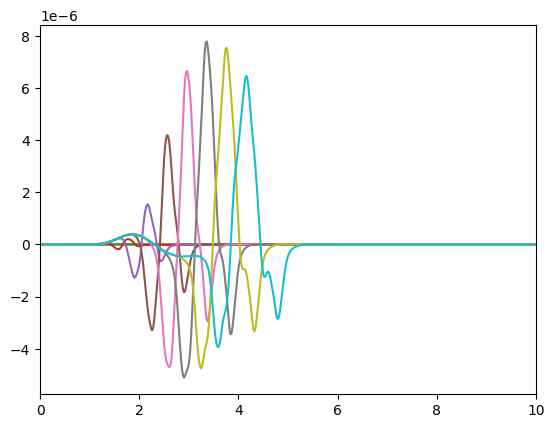

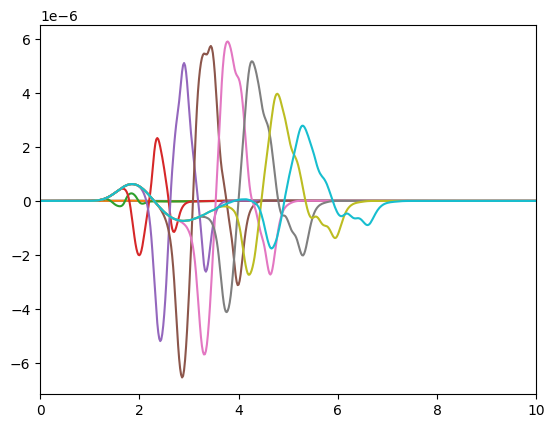

In [67]:
for i in range(39):
    plt.figure()
    for j in range(10):
        plt.plot(time,templates[j,i])
    plt.xlim([0,10])

In [62]:
np.max(templates[0],axis=-1)>2e-6

array([False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])